# The vocabulary of the problem:
### City: For the purpose of this exercise, a city is "atomic" in the sense that we don't have to know anything about the components or attributes of a city, just how far it is from other cities.
### Cities: We will need to represent a set of cities; Python's set datatype might be appropriate for that.
### Distance: We will need the distance between two cities.
### Tour: A tour is an ordered list of cities.
### Total distance: The sum of the distances of adjacent cities in the tour.

# Inicialização

In [42]:
import random, operator, time, itertools, math
import numpy

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from deap import algorithms, base, creator, tools

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import time

import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

# Algoritmo Genético

In [3]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [10]:
alltours = itertools.permutations

In [7]:
City = complex

In [11]:
def distance(A, B):
  return abs(A-B)

In [8]:
def generate_cities(n):
  return set(City(random.randrange(1,1000),random.randrange(1,1000)) 
            for i in range(n))

In [12]:
def total_distance(tour):
  return sum(distance(tour[i],tour[i-1]) for i in range(len(tour)))

def TSP(cities):
  return min(alltours(cities),key=total_distance)

In [20]:
def plot_tour(tour):
  tourX, tourY = [p.real for p in tour], [p.imag for p in tour]
  tourX = tourX + [tourX[0]]
  tourY = tourY + [tourY[0]]
  plt.plot(tourX, tourY, 'bo-')
  plt.plot([tourX[0]], [tourY[0]], 'gD', markersize=12)

In [9]:
num_cities = 30
cities = generate_cities(num_cities)
toolbox = base.Toolbox()
toolbox.register("indices", numpy.random.permutation, num_cities)
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual)

In [13]:
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("mate", tools.cxOrdered)

In [14]:
def index_to_cities(individual):
  return [list(cities)[e] for e in individual]

In [15]:
def evaluation(individual):
  return (total_distance(index_to_cities(individual)),)

In [16]:
toolbox.register("evaluate", evaluation)
toolbox.register("select", tools.selTournament, tournsize=3)

In [17]:
pop = toolbox.population(n=100) 

In [18]:
# cxpb (probabilidade de 2 indivíduos cruzarem)
# mutpb (probabilidade de mutação de um indivíduo)
# ngen (número de gerações). 

%%time
result, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2,
                                  ngen=300, verbose=False)

CPU times: user 3.53 s, sys: 81.8 ms, total: 3.61 s
Wall time: 5.08 s


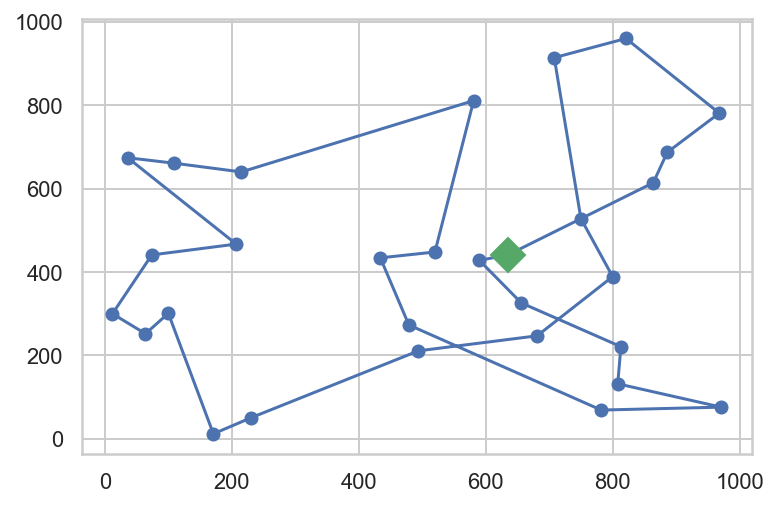

In [21]:
best = tools.selBest(result,k=1)[0]
plot_tour(index_to_cities(best))

# Algoritmo Greedy

In [22]:
def nearest(cities, C):
  return min(cities, key=lambda x: distance(x, C))

In [23]:
def TSP_greedy(cities):
  start = list(cities)[0]
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest(unvisited, tour[-1])
    tour.append(C)
    unvisited.remove(C)
  return tour

In [25]:
%timeit TSP_greedy(cities)

158 µs ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


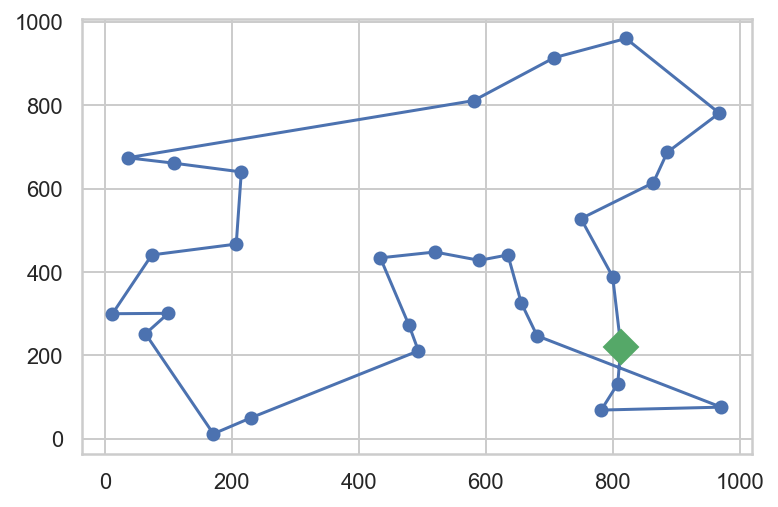

In [26]:
plot_tour(TSP_greedy(cities))

# Comparação

In [27]:
%timeit TSP_greedy(cities)

179 µs ± 60.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [40]:
distance_greedy = print('TSP_greedy() distance: ', total_distance(TSP_greedy(cities)))
distance_genetic = print('Genetic algorithm best distance: ', evaluation(best)[0])

TSP_greedy() distance:  4495.6156937237965
Genetic algorithm best distance:  5501.607155683543


In [45]:
distance_greedy = []
distance_genetic = []
t_greedy = []
t_genetic = []
for i in range(50):
    start = time.time()
    TSP_greedy(cities)
    end = time.time()
    distance_greedy.append(total_distance(TSP_greedy(cities)))
    t_greedy.append(end - start)
    pop = toolbox.population(n=100)
    start = time.time()
    result, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=300, verbose=False)
    end = time.time()
    best= tools.selBest(result,k=1)[0]
    t_genetic.append(end - start)
    distance_genetic.append(total_distance(index_to_cities(best)))

## Distância

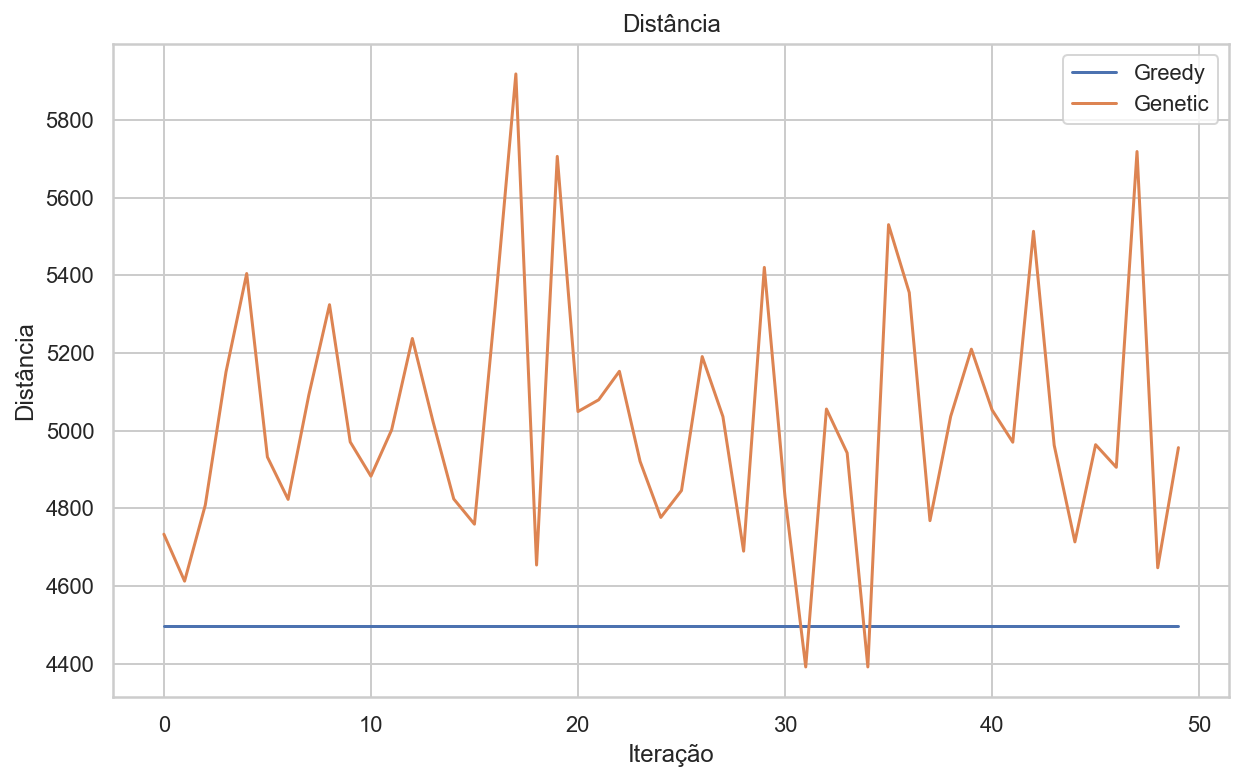

In [70]:
plt.figure(figsize=(10,6))
plt.title("Distância")
plt.ylabel("Distância")
plt.xlabel("Iteração")
plt.plot(distance_greedy)
plt.plot(distance_genetic)
plt.legend(["Greedy", "Genetic"])
plt.show()

### Distância Greedy

In [50]:
print("min:", np.min(distance_greedy))
print("max:", np.max(distance_greedy))
print("mean:", np.mean(distance_greedy))
print("std:", np.std(distance_greedy))

min: 4495.6156937237965
max: 4495.6156937237965
mean: 4495.6156937237965
std: 0.0


### Distância genética

In [51]:
print("min:", np.min(distance_genetic))
print("max:", np.max(distance_genetic))
print("mean:", np.mean(distance_genetic))
print("std:", np.std(distance_genetic))

min: 4391.255128651442
max: 5918.750215572312
mean: 5025.033018157302
std: 316.23051420273146


## Tempo 

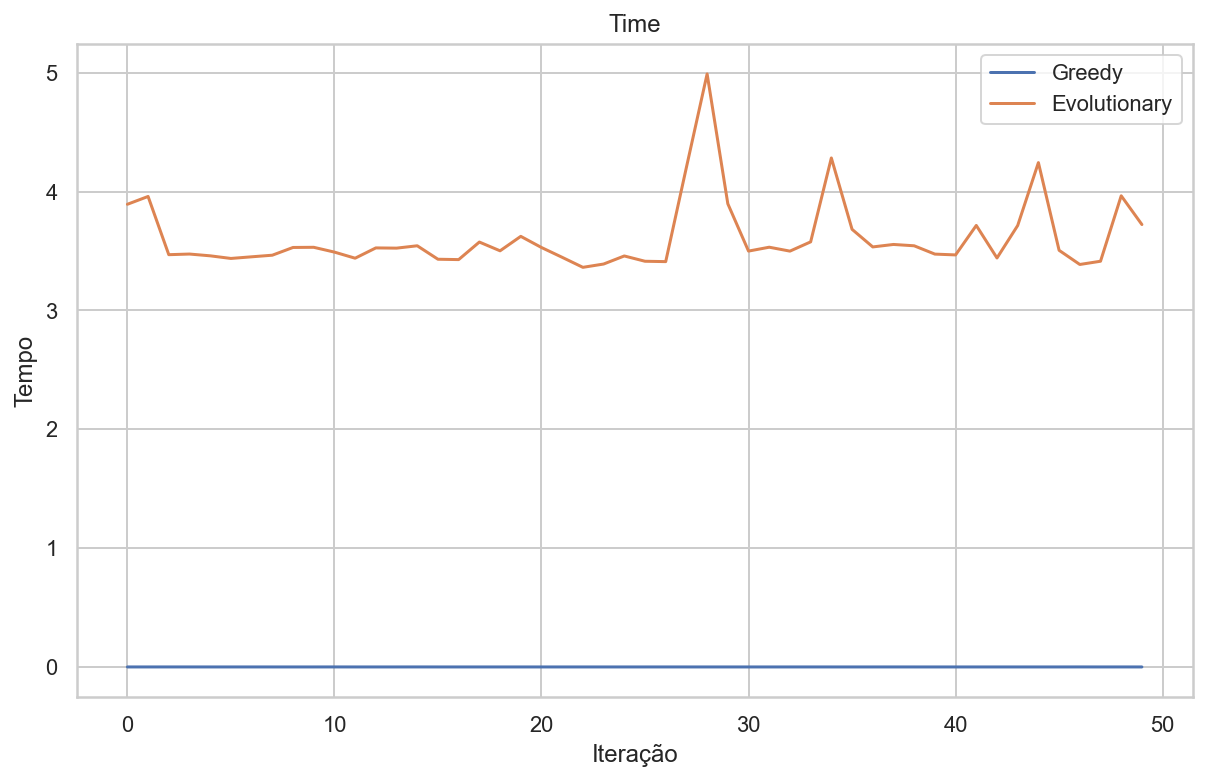

In [53]:
plt.figure(figsize=(10,6))
plt.title("Tempo")
plt.ylabel("Tempo")
plt.xlabel("Iteração")
plt.plot(t_greedy)
plt.plot(t_genetic)
plt.legend(["Greedy", "Evolutionary"])
plt.show()

### Tempo Greedy

In [54]:
print("min:", np.min(t_greedy))
print("max:", np.max(t_greedy))
print("mean:", np.mean(t_greedy))
print("std:", np.std(t_greedy))

min: 0.00011491775512695312
max: 0.0002701282501220703
mean: 0.00013597011566162108
std: 3.8426751605764634e-05


### Tempo genético

In [55]:
print("min:", np.min(t_genetic))
print("max:", np.max(t_genetic))
print("mean:", np.mean(t_genetic))
print("std:", np.std(t_genetic))

min: 3.3628220558166504
max: 4.990272045135498
mean: 3.612436375617981
std: 0.2935225082456575


# Variação da população

In [79]:
var_1 = 100
var_2 = 500
var_3 = 1000
var_4 = 5000
var_5 = 10000

variacoes = [var_1, var_2, var_3, var_4, var_5]

In [80]:
# Usar print, para saber em que estágio está na hora de rodar....
p_value = [0 for _ in range(len(variacoes))]
count=0
for i in range(len(variacoes)):
    pop = toolbox.population(n=variacoes[i])
    start = time.time()
    result, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=300, verbose=False)
    end = time.time()
    best= tools.selBest(result,k=1)[0]
    t_genetic.append(end - start)
    p_value[i] = total_distance(index_to_cities(best))

    duration = end - start
    count+=1 # Print a counter for the number of iterations
    print(f"End of var_{count}", "->", duration)

End of var_1 -> 3.4701030254364014
End of var_2 -> 19.239617109298706
End of var_3 -> 49.94806408882141
End of var_4 -> 226.826593875885
End of var_5 -> 459.8339960575104


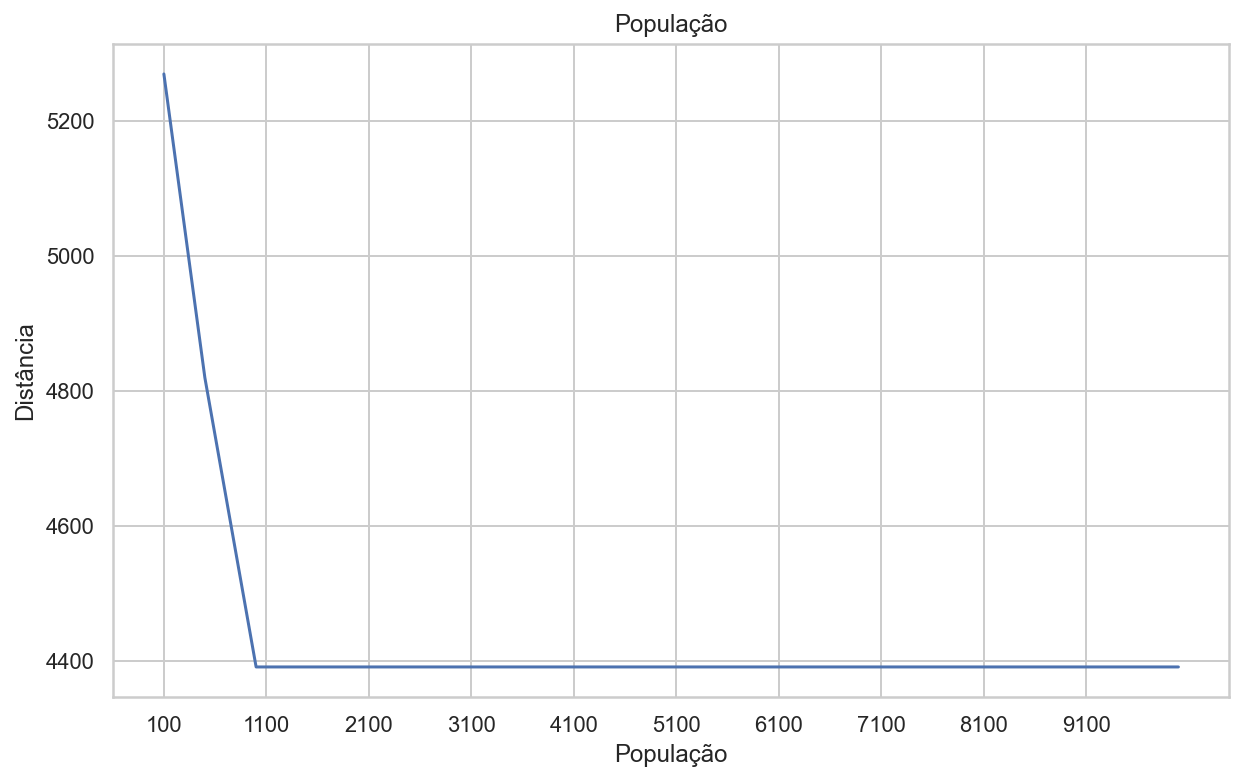

In [90]:
plt.figure(figsize=(10,6))
plt.title("População")
plt.xticks(np.arange(100, 10001, 1000))
plt.ylabel("Distância")
plt.xlabel("População")
plt.plot(variacoes, p_value)

# Variação de mutação e cruzamento

In [93]:
mutpb = [i for i in np.arange(0, 1, 0.1)]
cxpb = [i for i in np.arange(0, 1, 0.1)]

## Cruzamento

In [94]:
cx = [0 for _ in range(len(cxpb))]
p_value = toolbox.population(n=300)

for i in range(len(cxpb)):
    start = time.time()
    result, log = algorithms.eaSimple(p_value, toolbox, cxpb=cxpb[i], mutpb=0.2, ngen=300, verbose=False)
    end = time.time()
    best= tools.selBest(result,k=1)[0]
    cx[i] = total_distance(index_to_cities(best))

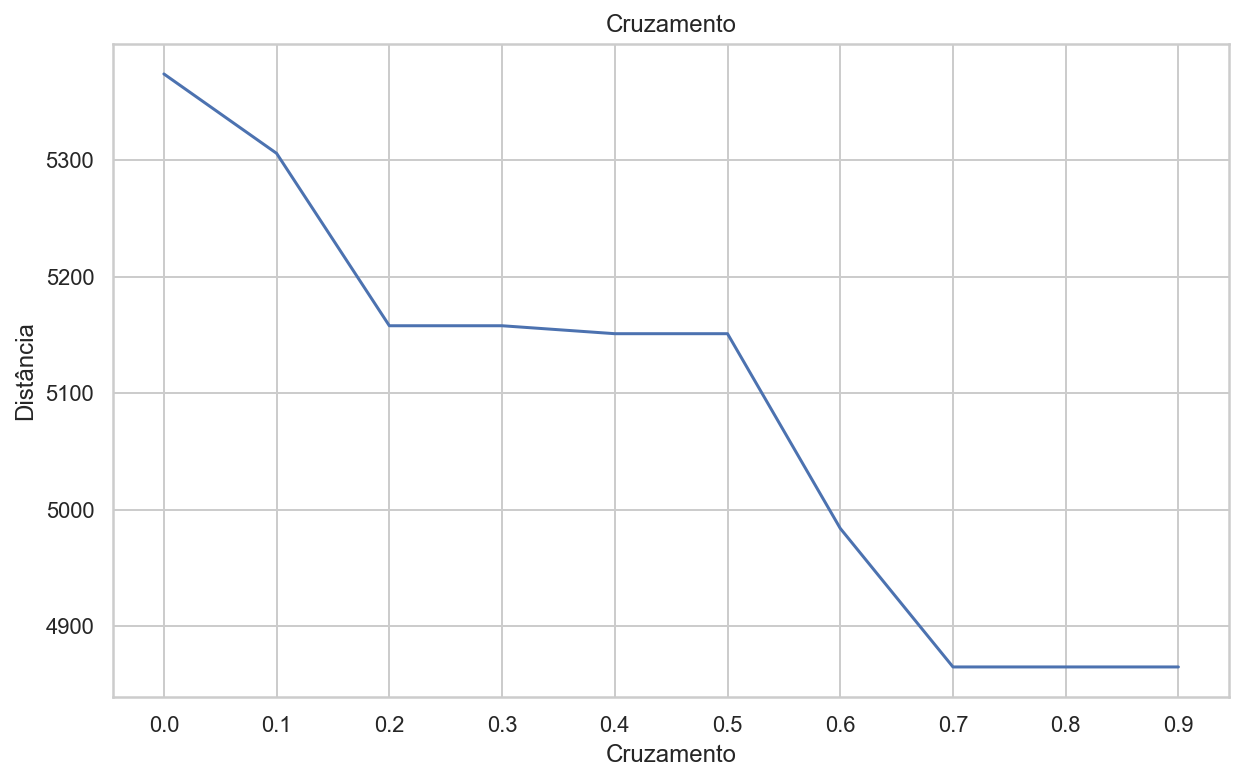

In [97]:
plt.figure(figsize=(10,6))
plt.title("Cruzamento")
plt.xticks(np.arange(0, 1, 0.1))
plt.ylabel("Distância")
plt.xlabel("Cruzamento")
plt.plot(cxpb, cx)

## Mutação

In [96]:
mut = [0 for _ in range(len(mutpb))]
p_value = toolbox.population(n=300)

for i in range(len(mutpb)):
    start = time.time()
    result, log = algorithms.eaSimple(p_value, toolbox, cxpb=0.8, mutpb=mutpb[i], ngen=300, verbose=False)
    end = time.time()
    best= tools.selBest(result,k=1)[0]
    mut[i] = total_distance(index_to_cities(best))

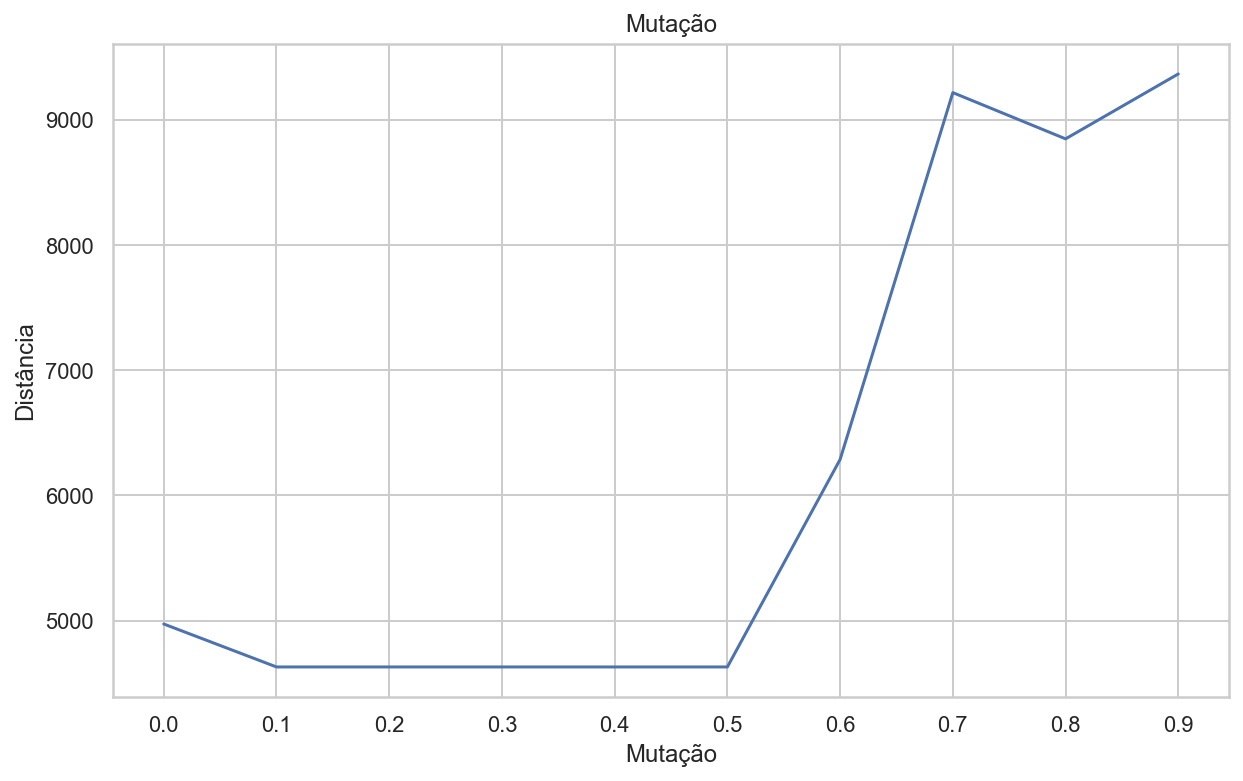

In [98]:
plt.figure(figsize=(10,6))
plt.title("Mutação")
plt.xticks(np.arange(0, 1, 0.1))
plt.ylabel("Distância")
plt.xlabel("Mutação")
plt.plot(mutpb, mut)